In [75]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from trasyn import synthesize_qiskit_circuit

In [76]:
U = random_unitary(4)
U

Operator([[ 0.412484  +0.30705726j,  0.17976135-0.148009j  ,
           -0.43820072-0.05493342j,  0.09350032+0.69106593j],
          [-0.11005884-0.35843877j,  0.10622935+0.37730222j,
            0.55083408+0.07666811j,  0.03607641+0.62862498j],
          [ 0.63255349-0.12886983j, -0.06647036-0.31727848j,
            0.46279885-0.48917535j, -0.1213014 -0.09997688j],
          [-0.26975398+0.32478134j, -0.78005612-0.28029638j,
            0.19914707-0.05031317j,  0.15673388+0.26065261j]],
         input_dims=(2, 2), output_dims=(2, 2))


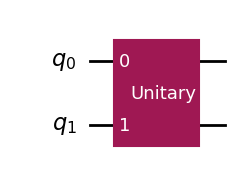

In [77]:
qc = QuantumCircuit(2)
qc.unitary(U, [0, 1])
qc.draw('mpl', filename='u_circuit.png')

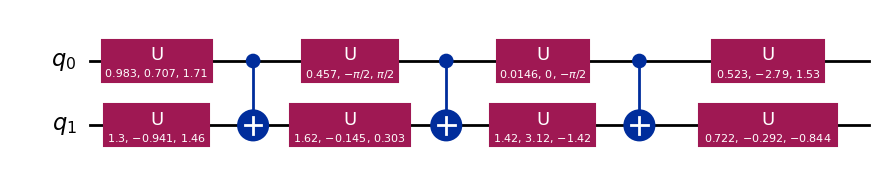

In [78]:
qc_transp = transpile(qc, basis_gates=['u', 'cx'])
qc_transp.global_phase = 0
qc_transp.draw('mpl', filename='u_circuit_transp.png')

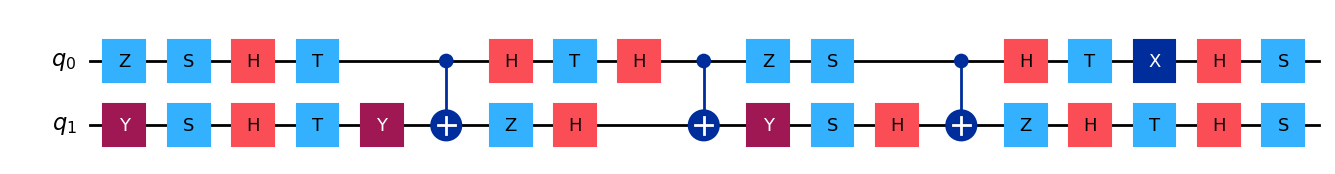

In [79]:
qc_synth = synthesize_qiskit_circuit(qc, nonclifford_budget=1)
qc_synth.draw('mpl', filename='u_circuit_synth.png')